# Random Forest Model

<p style="text-align:center;">
<img src="https://media-hosting.imagekit.io/b69e57f13a8c4704/TUA_Logo.jpg?Expires=1839414234&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=f5O8v-Nve21X-VcSbt0cosp2Jk1DIB6hVwzzDT8pYVOO4eD5XrIlS73WAW2igxVEzaC1NtIKX0dHNvmL-QnRpwo5hLylG7pkSLzU1QTZ0nY2aWoyK5VLI~8Md9MuhJUGX5kObBIPit2EigPy1NbdcJk09NWVnzJyx9EnwW4OydOr3O5XTcw~1UnceYRCGKF0-8RWku1M3tVTcm~GtAr6xzDfWi65kzP-ZWwDB4Iof4f1TMEHIvw95PVTKU-gg4HDplvsfzVXeJs1NL9kG71XRDF3J78Ce0CHntmtwdyyArJ6Y6fP~gMGLgP7SsIr02DXsApVgBCuXtrwhwpISp~khg__"
     alt="TUAlogo"
     style="float: center; margin-right: 10px;"
     width="700" height="200" />
</p>

In [1]:
import numpy as np  # For math operations
import seaborn as sns  # For making plots
import matplotlib.pyplot as plt  # For creating charts
import pandas as pd  # For working with data

# Show all columns in a DataFrame
pd.set_option('display.max_columns', None)

# Import tools for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # For splitting data and tuning models
from sklearn.ensemble import RandomForestClassifier  # For building a Random Forest model
from sklearn.metrics import classification_report, confusion_matrix  # For checking model performance
from sklearn import tree # For plotting tree
from sklearn import metrics

## Read in the data

In [2]:
df = pd.read_excel('/Users/mahamedabdulle/Documents/digital futures/projects/swan/1 - Project Data.xlsx') # Read in the data

In [3]:
df.head() # Read first 5 data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [4]:
# Total Charges has values of empty string, this is because they have signed up, but have not yet paid for anything
empty_data = df[df['Total Charges'] == ' ']
empty_data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0,NaN


## Feature Engineering

1. **Drop Unnecessary Columns**:  
   Drop the following columns to improve the performance of the random forest model:
   - `CustomerID`
   - `Count`
   - `Country`
   - `State`
   - `Zip Code`
   - `Lat Long`
   - `Latitude`
   - `Longitude`
   - `Churn Reason`
   - `Churn Label`


2. **Fill Missing Values**:  
   Replace empty strings in the `Total Charges` column with `0`.

3. **Assign a number to each city**

    - `City`

4. **Map values to allow for values and not strings**
    - `Gender`
    - `Senior Citizen`
    - `Partner`
    - `Dependents`
    - `Phone Service`
    - `Multiple Lines`
    - `Internet Service`
    - `Online Security`
    - `Online Backup`
    - `Device Protection`
    - `Tech Support`
    - `Streaming TV`
    - `Streaming Movies`
    - `Contract`
    - `Paperless Billing`
    - `Payment Method`

In [5]:
def feature_engineering(df):
    # Columns we do not need for modelling
    columns_to_drop = ['CustomerID','Count','Country','State','Zip Code','Lat Long', 'Latitude', 'Longitude','Churn Reason', 'Churn Label']

    # Having a copy to ensure we don't mess with actual dataset
    df = df.copy()

    # Dropping unneccesary columns
    df.drop(columns_to_drop,axis=1,inplace=True)

    # Replacing empty strings with 0
    df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce')

    
    # Replaces Cities with integers
    df['City'] = pd.factorize(df['City'])[0]

    # Our binary mappings
    binary_mappings = {
        'Gender': {'Male': 0, 'Female': 1},
        'Senior Citizen': {'No': 0, 'Yes': 1},
        'Partner': {'No': 0, 'Yes': 1},
        'Dependents': {'No': 0, 'Yes': 1},
        'Phone Service': {'No': 0, 'Yes': 1},
        'Multiple Lines': {'No': 0, 'Yes': 1, 'No phone service': 2},
        'Internet Service': {'No': 0, 'DSL': 1, 'Fiber optic': 2},
        'Online Security': {'No': 0, 'Yes': 1, 'No internet service': 2},
        'Online Backup': {'No': 0, 'Yes': 1, 'No internet service': 2},
        'Device Protection': {'No': 0, 'Yes': 1, 'No internet service': 2},
        'Tech Support': {'No': 0, 'Yes': 1, 'No internet service': 2},
        'Streaming TV': {'No': 0, 'Yes': 1, 'No internet service': 2},
        'Streaming Movies': {'No': 0, 'Yes': 1, 'No internet service': 2},
        'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
        'Paperless Billing': {'No': 0, 'Yes': 1},
        'Payment Method': {
            'Mailed check': 0,
            'Electronic check': 1,
            'Bank transfer (automatic)': 2,
            'Credit card (automatic)': 3
        }
    }

    # Mapping our data
    for column, mapping in binary_mappings.items():
        if column in df.columns:
            df[column] = df[column].astype(str).str.strip().replace(mapping)

    return df
    

In [6]:
df_fe = feature_engineering(df)
df_fe.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,0,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
1,0,1,0,0,1,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1
2,0,1,0,0,1,8,1,1,2,0,0,1,0,1,1,0,1,1,99.65,820.50,1
3,0,1,0,1,1,28,1,1,2,0,0,1,1,1,1,0,1,1,104.80,3046.05,1
4,0,0,0,0,1,49,1,1,2,0,1,1,0,1,1,0,1,2,103.70,5036.30,1


In [7]:
# Ensuring only numeric values enter the model
df_fe.dtypes

City                   int64
Gender                 int64
Senior Citizen         int64
Partner                int64
Dependents             int64
Tenure Months          int64
Phone Service          int64
Multiple Lines         int64
Internet Service       int64
Online Security        int64
Online Backup          int64
Device Protection      int64
Tech Support           int64
Streaming TV           int64
Streaming Movies       int64
Contract               int64
Paperless Billing      int64
Payment Method         int64
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
dtype: object

## Train Test Splitting

In [8]:
X = df_fe.drop('Churn Value',axis=1) # Our features
y = df_fe['Churn Value'].copy() # Our target

In [9]:
X.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,0,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15
1,0,1,0,0,1,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65
2,0,1,0,0,1,8,1,1,2,0,0,1,0,1,1,0,1,1,99.65,820.50
3,0,1,0,1,1,28,1,1,2,0,0,1,1,1,1,0,1,1,104.80,3046.05
4,0,0,0,0,1,49,1,1,2,0,1,1,0,1,1,0,1,2,103.70,5036.30


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Value, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # Splitting data 80/20 -> train/test

In [12]:
all(X_train.index == y_train.index) # Ensuring that it was split properly

True

In [13]:
all(X_test.index == y_test.index) # Ensuring that it was split properly

True

## Random Forest

In [14]:
# Initalise RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [15]:
# Cross-validation - checks how well model does on training data
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print(f'Cross-validation Scores: {rf_score}')
print(f'Mean Cross-validation Score: {rf_score.mean()}')

Cross-validation Scores: [0.83584738 0.81543922 0.80567879 0.80745342 0.8277087 ]
Mean Cross-validation Score: 0.818425502875488


In [16]:
# Testing out different combinations of parameters to test
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}

# Use GridSearch to find best combination of parameters to test
gs = GridSearchCV(rf, param_grid=rf_params, cv=10)

In [17]:
# Fit the grid search to training data
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]})

In [18]:
# Print the best results from GridSearchCV
print(f'Best Cross-Validation Score: {gs.best_score_}')
print(f'Best Parameters: {gs.best_params_}')

Best Cross-Validation Score: 0.8189521056145523
Best Parameters: {'max_depth': 5, 'n_estimators': 100}


In [29]:
# Get the best model and evaluate it
best_rf = gs.best_estimator_
print(f'Training Accuracy: {best_rf.score(X_train, y_train)}')
print(f'Testing Accuracy: {best_rf.score(X_test, y_test)}')

Training Accuracy: 0.8285410010649628
Testing Accuracy: 0.8204400283889283


In [30]:
# Print confusion matrix of results
y_pred = best_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[932  77]
 [176 224]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1009
           1       0.74      0.56      0.64       400

    accuracy                           0.82      1409
   macro avg       0.79      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [31]:
# Helper function printing accuracy, recall, precision and f1
def results(actual, predicted):
    print(f'The accuracy of the Churning prediction model is: {metrics.accuracy_score(predicted, actual)}') ## accuracy
    print(f'The recall of the Churning prediction model is: {metrics.recall_score(predicted, actual)}') ## recall
    print(f'The precision of the Churning prediction model is: {metrics.precision_score(predicted, actual)}') ## precision
    print(f'The F1-score of the Churning prediction model is: {metrics.f1_score(predicted, actual)}') ## f1

In [32]:
# printing results
results(y_test,y_pred)

The accuracy of the Churning prediction model is: 0.8204400283889283
The recall of the Churning prediction model is: 0.7441860465116279
The precision of the Churning prediction model is: 0.56
The F1-score of the Churning prediction model is: 0.6390870185449358


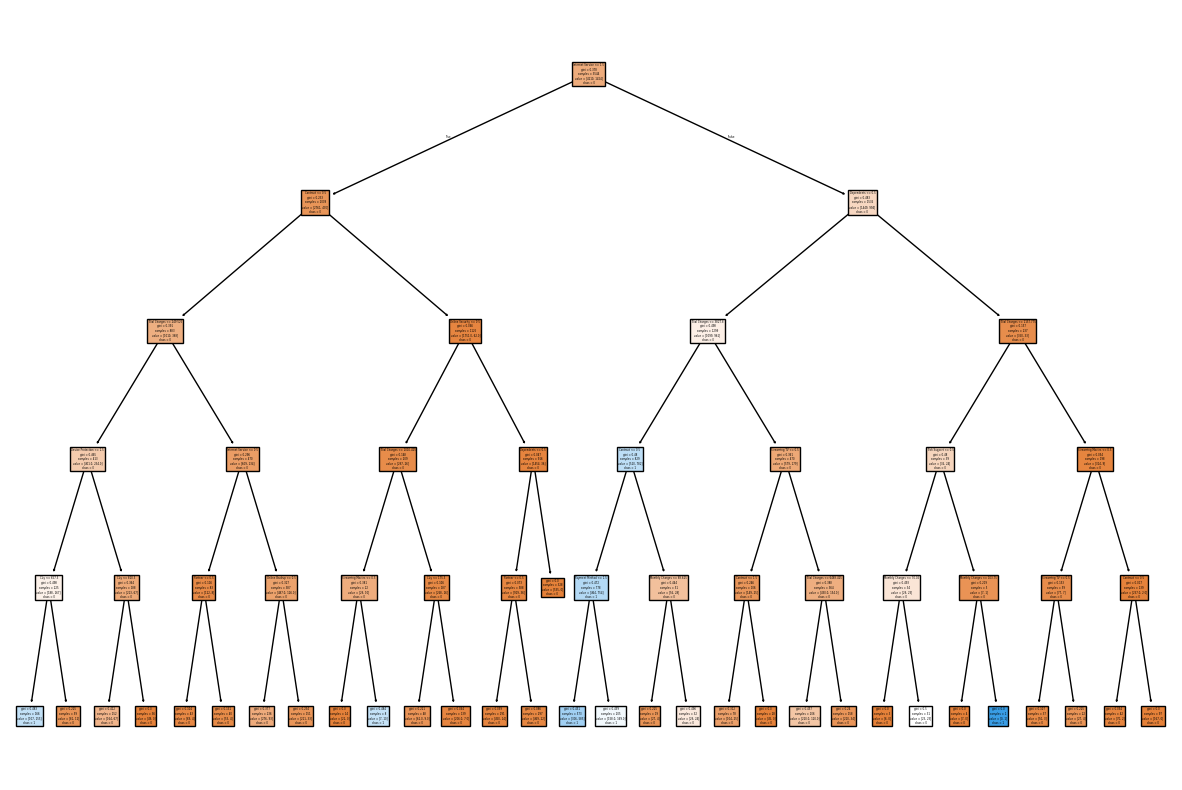

In [33]:
# Plotting first tree
single_tree = best_rf.estimators_[0]
feature_cols = X_train.columns

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(single_tree, 
                   feature_names=feature_cols,  
                   class_names=['0', '1'],
                   filled=True)
plt.savefig('/Users/mahamedabdulle/Documents/digital futures/projects/swan/random_forest_trees.png',dpi=300)

In [34]:
# Get feature importances from the best estimator
feature_names = X_train.columns
importances = best_rf.feature_importances_
feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display top features
print("Top 10 important features:")
print(feature_importance_df.head(10))

Top 10 important features:
Contract             0.187546
City                 0.149828
Tenure Months        0.148346
Online Security      0.102133
Internet Service     0.086975
Tech Support         0.080061
Total Charges        0.066305
Dependents           0.050660
Monthly Charges      0.038213
Device Protection    0.023194
dtype: float64


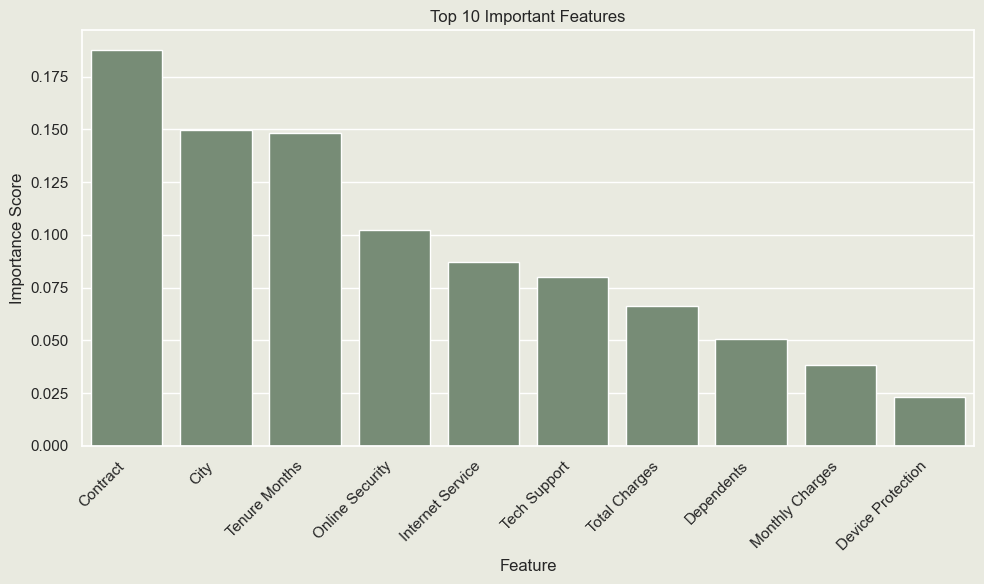

In [58]:
# Set background style
sns.set(rc={'axes.facecolor': '#E9EAE0', 'figure.facecolor': '#E9EAE0'})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Feature', y='Importance', color='#749072')

plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/Users/mahamedabdulle/Documents/digital futures/projects/swan/submission/important_features.png')

plt.show()

## Getting Top 500

Now I will try to get top 500 most likely to churn. I will remove all those that have already churned

In [39]:
top_data = pd.read_excel('/Users/mahamedabdulle/Documents/digital futures/projects/swan/1 - Project Data.xlsx')

In [40]:
top_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [41]:
top_data = top_data[top_data['Churn Value'] != 1] # Getting those who haven't yet churned

In [42]:
top_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


In [43]:
customer_id = top_data['CustomerID']
customer_id.head() # Keeping track of customer id, so we could email them deals for example

1869    7590-VHVEG
1870    5575-GNVDE
1871    7795-CFOCW
1872    1452-KIOVK
1873    6713-OKOMC
Name: CustomerID, dtype: object

In [44]:
top_data_fe = feature_engineering(top_data)

In [45]:
top_data_fe.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
1869,0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1870,0,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
1871,0,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
1872,0,0,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40,0
1873,0,1,0,0,0,10,0,2,1,1,0,0,0,0,0,0,0,0,29.75,301.90,0


In [46]:
X = top_data_fe.drop('Churn Value',axis=1)
top_data_fe['Prob'] = best_rf.predict_proba(X)[:, 1]

In [47]:
top_data_fe = top_data_fe

In [55]:
top_data_fe.head(10)

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Prob
1869,7590-VHVEG,0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0,0.596329
1870,5575-GNVDE,0,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0,0.101810
1871,7795-CFOCW,0,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0,0.081962
1872,1452-KIOVK,0,0,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40,0,0.328843
1873,6713-OKOMC,0,1,0,0,0,10,0,2,1,1,0,0,0,0,0,0,0,0,29.75,301.90,0,0.359373
1874,6388-TABGU,0,0,0,0,0,62,1,0,1,1,1,0,0,0,0,1,0,2,56.15,3487.95,0,0.104385
1875,9763-GRSKD,0,0,0,1,1,13,1,0,1,1,0,0,0,0,0,0,1,0,49.95,587.45,0,0.267747
1876,7469-LKBCI,0,0,0,0,0,16,1,0,0,2,2,2,2,2,2,2,0,3,18.95,326.80,0,0.045592
1877,8091-TTVAX,0,0,0,1,0,58,1,1,2,0,0,1,0,1,1,1,0,3,100.35,5681.10,0,0.274274
1878,5129-JLPIS,0,0,0,0,0,25,1,0,2,1,0,1,1,1,1,0,1,1,105.50,2686.05,0,0.368622


In [56]:
customer_id.index.equals(top_data_fe.index)

True

In [50]:
top_data_fe.insert(0, 'CustomerID', customer_id)

In [51]:
top_data_fe

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Prob
1869,7590-VHVEG,0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0,0.596329
1870,5575-GNVDE,0,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0,0.101810
1871,7795-CFOCW,0,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0,0.081962
1872,1452-KIOVK,0,0,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40,0,0.328843
1873,6713-OKOMC,0,1,0,0,0,10,0,2,1,1,0,0,0,0,0,0,0,0,29.75,301.90,0,0.359373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,184,1,0,0,0,72,1,0,0,2,2,2,2,2,2,2,1,2,21.15,1419.40,0,0.026850
7039,6840-RESVB,894,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,0,84.80,1990.50,0,0.034307
7040,2234-XADUH,185,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90,0,0.143469
7041,4801-JZAZL,186,1,0,1,1,11,0,2,1,1,0,0,0,0,0,0,1,1,29.60,346.45,0,0.286387


In [64]:
data_submit = top_data_fe[['CustomerID', 'Prob']]
data_submit.head()

,CustomerID,Prob
1869,7590-VHVEG,0.596329
1870,5575-GNVDE,0.101810
1871,7795-CFOCW,0.081962
1872,1452-KIOVK,0.328843
1873,6713-OKOMC,0.359373


In [65]:
len(data_submit)

5174

In [67]:
top_500_submit = data_submit.sort_values(by='Prob',ascending=False).head(500)
top_500_submit.head()

,CustomerID,Prob
5906,4912-PIGUY,0.751924
5657,7577-SWIFR,0.748797
2676,7439-DKZTW,0.742841
2125,0021-IKXGC,0.735517
2215,1452-VOQCH,0.734566


In [68]:
data_submit.to_csv('likely_to_churn.csv')

In [69]:
top_500_submit.to_csv('top_500_likely_to_churn.csv')

# Conclusion

Overall, we decided to use our `Random Forest Model`. This is because our `Logisitic Model` did not perform as well as we hoped.

## Logistic Regression

<p style="text-align:center;">
<img src="https://media-hosting.imagekit.io/e4a2237b18964369/LOGREG_METRICS.png?Expires=1839414422&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=Fc-ZsL6p0ldEVe-VjO8gcsH-juqIKfA8sskAYj0xMlzf2-0HjckaE5UOimo~EHCftxENcxjDXdcGG2mq5fhWsIrUIY59iAjSjb5hLQSU8mVevsn~PoPAd~8pZl~d4FHjfon-NIIN3DL8QqFcg2RW031VoqA9cVY4SAGzeO1h8ET8FKO853U-Dd1xVGA6cxPD0OazQRee9n0ht-LQrvbrBFmG4jSI12oyOMk4spS3xzKN9qyJJ~kue5y-LjFQlITGOit2n4zbqXk0yXxTpaGtbTiwTAcFv93xkmauivhmZLaxlz7bG73b8J6BTiJLdakT~mrzpekqkrokRxLfI0UZ8Q__"
     alt="logreg performance"
     style="float: center; margin-right: 10px;"
     width="700" height="200" />
</p>

As shown, while metrics like `accuracy` and `F1-score` are comparable, our primary focus is on `recall`. This is because our goal is to correctly identify users who churn, and `recall` better captures our ability to detect these instances.